Importing the libraries, required in further actions

In [67]:
import seaborn
import pandas
import matplotlib.pyplot as plt
import numpy

Now let's import the data we have for training

In [68]:
train_data = pandas.read_csv('application_train.csv')
test_data = pandas.read_csv('application_test.csv')

Now we need to perform EDA on our data. For the beginning, let's evaluate the size of our dataset.

In [69]:
print(train_data.shape)

(307511, 122)


Now let's take 10 random rows from the dataset to look at probable missing values and data types of the columns.

In [70]:
train_data.sample(10)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
216158      350459       0         Cash loans           M            Y   
296762      443821       1         Cash loans           F            N   
118118      236968       1         Cash loans           F            N   
75670       187746       0         Cash loans           M            Y   
63122       173209       0         Cash loans           F            Y   
110200      227816       0         Cash loans           M            N   
40912       147378       0         Cash loans           F            N   
219621      354431       0         Cash loans           F            N   
23215       127013       1         Cash loans           M            N   
125063      245034       0         Cash loans           M            Y   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
216158               Y             1          157500.0    896602.5   
296762               Y             0          202500.0    518562.0   
118118               Y             0          157500.0    619749.0   
75670                Y             0          180000.0   1288350.0   
63122                Y             0          135000.0    284256.0   
110200               N             0          202500.0    290358.0   
40912                Y             0          135000.0    320040.0   
219621               Y             0          540000.0    998010.0   
23215                Y             0          135000.0    284400.0   
125063               N             0          283500.0   2326797.0   

        AMT_ANNUITY  ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20  \
216158      28282.5  ...                 0                0                0   
296762      26604.0  ...                 0                0                0   
118118      43132.5  ...                 0                0                0   
75670       37800.0  ...                 0                0                0   
63122       27819.0  ...                 0                0                0   
110200      30618.0  ...                 0                0                0   
40912       12195.0  ...                 0                0                0   
219621      74749.5  ...                 0                0                0   
23215       22599.0  ...                 0                0                0   
125063      81364.5  ...                 1                0                1   

       FLAG_DOCUMENT_21 AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
216158                0                        0.0                       0.0   
296762                0                        0.0                       0.0   
118118                0                        0.0                       0.0   
75670                 0                        0.0                       0.0   
63122                 0                        0.0                       0.0   
110200                0                        0.0                       0.0   
40912                 0                        0.0                       0.0   
219621                0                        0.0                       0.0   
23215                 0                        0.0                       0.0   
125063                0                        0.0                       0.0   

        AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
216158                         0.0                        0.0   
296762                         0.0                        0.0   
118118                         0.0                        1.0   
75670                          0.0                        0.0   
63122                          0.0                        0.0   
110200                         0.0                        0.0   
40912                          0.0                        0.0   
219621                         0.0                        1.0   
23215                          0.0                        0.0   
125063    

As we have a lot of columns, let's at first take a look at types we have without hands-on management

In [71]:
train_data.dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 122, dtype: object

Now lets remove all duplicate rows if such exist

In [72]:
duplicates = train_data[train_data.duplicated()]
print(duplicates.size)

0


We have no duplicates, now let's remove some columns which should not have any influence on the result (loan return)
We can remove columns: NAME_CONTRACT_TYPE, REGION_POPULATION_RELATIVE, DAYS_REGISTRATION, DAYS_ID_PUBLISH, FLAG_PHONE, CNT_CHILDREN, REGION_RATING_CLIENT, WEEKDAY_APPR_PROCESS_START, HOUR_APPR_PROCESS_START, REG_REGION_NOT_LIVE_REGION, REG_CITY_NOT_WORK_CITY, LIVE_CITY_NOT_WORK_CITY,ELEVATORS_AVG, ENTRANCES_AVG, ELEVATORS_MODE, ENTRANCES_MODE, ELEVATORS_MEDI, ENTRANCES_MEDI, AMT_REQ_CREDIT_BUREAU_HOUR, AMT_REQ_CREDIT_BUREAU_WEEK, AMT_REQ_CREDIT_BUREAU_QRT

In [73]:
columns_to_remove = [
    "NAME_CONTRACT_TYPE", "REGION_POPULATION_RELATIVE", "DAYS_REGISTRATION",
    "DAYS_ID_PUBLISH", "FLAG_PHONE", "CNT_CHILDREN", "REGION_RATING_CLIENT",
    "WEEKDAY_APPR_PROCESS_START", "HOUR_APPR_PROCESS_START", "REG_REGION_NOT_LIVE_REGION",
    "REG_CITY_NOT_WORK_CITY", "LIVE_CITY_NOT_WORK_CITY", "ELEVATORS_AVG", "ENTRANCES_AVG",
    "ELEVATORS_MODE", "ENTRANCES_MODE", "ELEVATORS_MEDI", "ENTRANCES_MEDI",
    "AMT_REQ_CREDIT_BUREAU_HOUR", "AMT_REQ_CREDIT_BUREAU_QRT", "AMT_REQ_CREDIT_BUREAU_WEEK"
]
train_data = train_data.drop(columns=columns_to_remove)
test_data = test_data.drop(columns=columns_to_remove)

Printing sample of data for convenient separation of categorical values from numerical

In [74]:
train_data.sample(5)

SK_ID_CURR  TARGET CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
229779      366141       0           F            N               Y   
156207      281078       0           M            Y               Y   
202140      334323       0           F            N               Y   
281115      425688       0           F            N               Y   
960         101110       0           F            Y               N   

        AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
229779           90000.0    916470.0      26928.0         765000.0   
156207          225000.0    377649.0      17604.0         265500.0   
202140          166500.0    675000.0      19867.5         675000.0   
281115          157500.0   1205451.0      39969.0        1080000.0   
960             135000.0    755190.0      31995.0         675000.0   

        NAME_TYPE_SUITE  ... FLAG_DOCUMENT_15 FLAG_DOCUMENT_16  \
229779  Spouse, partner  ...                0                0   
156207    Unaccompanied  ...                0                0   
202140  Spouse, partner  ...                0                0   
281115    Unaccompanied  ...                0                0   
960       Unaccompanied  ...                0                0   

       FLAG_DOCUMENT_17 FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  \
229779                0                0                 0                 0   
156207                0                0                 0                 0   
202140                0                0                 0                 0   
281115                0                0                 0                 0   
960                   0                0                 0                 0   

        FLAG_DOCUMENT_21  AMT_REQ_CREDIT_BUREAU_DAY  \
229779                 0                        NaN   
156207                 0                        0.0   
202140                 0                        NaN   
281115                 0                        0.0   
960                    0                        0.0   

        AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_YEAR  
229779                        NaN                         NaN  
156207                        0.0                         3.0  
202140                        NaN                         NaN  
281115                        0.0                         0.0  
960                           0.0                         3.0  

[5 rows x 101 columns]

From the columns we have left, let's separate numerical datatypes from categorical, for this we need to mark down each categorical column, simultaneously let's split categorical columns on ordinal and nominal.
Ordinal columns: NAME_EDUCATION_TYPE, NAME_INCOME_TYPE, REGION_RATING_W_CITY, 
Nominal columns: CODE_GENDER, FLAG_OWN_CAR, FLAG_OWN_REALTY, NAME_TYPE_SUITE, NAME_FAMILY_STATUS, NAME_HOUSING_TYPE, FLAG_MOBIL, FLAG_EMP_PHONE, FLAG_WORK_PHONE, FLAG_CONT_MOBILE, FLAG_EMAIL, OCCUPATION_TYPE, REG_REGION_NOT_WORK_REGION, LIVE_REGION_NOT_WORK_REGION, REG_CITY_NOT_LIVE_CITY, ORGANIZATION_TYPE, FONDKAPREMONT_MODE, HOUSETYPE_MODE, WALLSMATERIAL_MODE, EMERGENCYSTATE_MODE, FLAG_DOCUMENT_2, FLAG_DOCUMENT_3, FLAG_DOCUMENT_4, FLAG_DOCUMENT_5, FLAG_DOCUMENT_6, FLAG_DOCUMENT_7, FLAG_DOCUMENT_8, FLAG_DOCUMENT_9, FLAG_DOCUMENT_10, FLAG_DOCUMENT_11, FLAG_DOCUMENT_12, FLAG_DOCUMENT_13, FLAG_DOCUMENT_14, FLAG_DOCUMENT_15, FLAG_DOCUMENT_16, FLAG_DOCUMENT_17, FLAG_DOCUMENT_18, FLAG_DOCUMENT_19, FLAG_DOCUMENT_20, FLAG_DOCUMENT_21

In [75]:
ordinal_columns = ["NAME_EDUCATION_TYPE", "NAME_INCOME_TYPE", "REGION_RATING_W_CITY"]
nominal_columns = [
    "CODE_GENDER", "FLAG_OWN_CAR", "FLAG_OWN_REALTY", "NAME_TYPE_SUITE", "NAME_FAMILY_STATUS",
    "NAME_HOUSING_TYPE", "FLAG_MOBIL", "FLAG_EMP_PHONE", "FLAG_WORK_PHONE", "FLAG_CONT_MOBILE",
    "FLAG_EMAIL", "OCCUPATION_TYPE", "REG_REGION_NOT_WORK_REGION", "LIVE_REGION_NOT_WORK_REGION",
    "REG_CITY_NOT_LIVE_CITY", "ORGANIZATION_TYPE", "FONDKAPREMONT_MODE", "HOUSETYPE_MODE",
    "WALLSMATERIAL_MODE", "EMERGENCYSTATE_MODE", "FLAG_DOCUMENT_2", "FLAG_DOCUMENT_3",
    "FLAG_DOCUMENT_4", "FLAG_DOCUMENT_5", "FLAG_DOCUMENT_6", "FLAG_DOCUMENT_7", "FLAG_DOCUMENT_8",
    "FLAG_DOCUMENT_9", "FLAG_DOCUMENT_10", "FLAG_DOCUMENT_11", "FLAG_DOCUMENT_12", "FLAG_DOCUMENT_13",
    "FLAG_DOCUMENT_14", "FLAG_DOCUMENT_15", "FLAG_DOCUMENT_16", "FLAG_DOCUMENT_17",
    "FLAG_DOCUMENT_18", "FLAG_DOCUMENT_19", "FLAG_DOCUMENT_20", "FLAG_DOCUMENT_21"
]
for column in ordinal_columns + nominal_columns:
    if column in train_data.columns:
        train_data[column] = train_data[column].astype("category")
        test_data[column] = test_data[column].astype("category")
train_data.dtypes

SK_ID_CURR                       int64
TARGET                           int64
CODE_GENDER                   category
FLAG_OWN_CAR                  category
FLAG_OWN_REALTY               category
                                ...   
FLAG_DOCUMENT_20              category
FLAG_DOCUMENT_21              category
AMT_REQ_CREDIT_BUREAU_DAY      float64
AMT_REQ_CREDIT_BUREAU_MON      float64
AMT_REQ_CREDIT_BUREAU_YEAR     float64
Length: 101, dtype: object

Now let's handle the absent values in each column, as a starting point lets find the frequency of such in each column (we will do this respectively for test_data as well):

In [76]:
train_data.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
FLAG_OWN_REALTY                   0
                              ...  
FLAG_DOCUMENT_20                  0
FLAG_DOCUMENT_21                  0
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 101, dtype: int64

Now we need to handle columns where nulls are present with individual approach. Rows where AMT_ANNUITY is null or AMT_GOODS_PRICE is null we can delete without consequences because we have 300000+ of entries, while the biggest value of deleted rows in this case may equal 290. For test data let's replace with median.

In [77]:
train_data = train_data.dropna(subset=["AMT_ANNUITY", "AMT_GOODS_PRICE"])
median_values = test_data[["AMT_ANNUITY", "AMT_GOODS_PRICE"]].median()
test_data = test_data.assign(
    AMT_ANNUITY=test_data["AMT_ANNUITY"].fillna(median_values["AMT_ANNUITY"]),
    AMT_GOODS_PRICE=test_data["AMT_GOODS_PRICE"].fillna(median_values["AMT_GOODS_PRICE"])
)
train_data.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
FLAG_OWN_REALTY                   0
                              ...  
FLAG_DOCUMENT_20                  0
FLAG_DOCUMENT_21                  0
AMT_REQ_CREDIT_BUREAU_DAY     41472
AMT_REQ_CREDIT_BUREAU_MON     41472
AMT_REQ_CREDIT_BUREAU_YEAR    41472
Length: 101, dtype: int64

For the column NAME_TYPE_SUITE we can suggest that absence of value equal to nobody (when looking for people who accompanied the borrower)

In [78]:
train_data["NAME_TYPE_SUITE"] = train_data["NAME_TYPE_SUITE"].fillna("Unaccompanied")
test_data["NAME_TYPE_SUITE"] = test_data["NAME_TYPE_SUITE"].fillna("Unaccompanied")
train_data.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
FLAG_OWN_REALTY                   0
                              ...  
FLAG_DOCUMENT_20                  0
FLAG_DOCUMENT_21                  0
AMT_REQ_CREDIT_BUREAU_DAY     41472
AMT_REQ_CREDIT_BUREAU_MON     41472
AMT_REQ_CREDIT_BUREAU_YEAR    41472
Length: 101, dtype: int64

In [79]:
own_car_age_median = train_data["OWN_CAR_AGE"].median()
train_data.loc[(train_data["FLAG_OWN_CAR"] == "N") & (train_data["OWN_CAR_AGE"].isnull()), "OWN_CAR_AGE"] = 0
test_data.loc[(test_data["FLAG_OWN_CAR"] == "N") & (test_data["OWN_CAR_AGE"].isnull()), "OWN_CAR_AGE"] = 0
train_data.loc[(train_data["FLAG_OWN_CAR"] != "N") & (train_data["OWN_CAR_AGE"].isnull()), "OWN_CAR_AGE"] = own_car_age_median
test_data.loc[(test_data["FLAG_OWN_CAR"] != "N") & (test_data["OWN_CAR_AGE"].isnull()), "OWN_CAR_AGE"] = own_car_age_median
train_data.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
FLAG_OWN_REALTY                   0
                              ...  
FLAG_DOCUMENT_20                  0
FLAG_DOCUMENT_21                  0
AMT_REQ_CREDIT_BUREAU_DAY     41472
AMT_REQ_CREDIT_BUREAU_MON     41472
AMT_REQ_CREDIT_BUREAU_YEAR    41472
Length: 101, dtype: int64

Let's delete all rows with NaN values in columns where overall amount of NaN is less then 1000, it won't significantly influence the result:

In [80]:
train_data = train_data.dropna(subset=["EXT_SOURCE_2", "DAYS_LAST_PHONE_CHANGE"])
median_values = test_data[["EXT_SOURCE_2", "DAYS_LAST_PHONE_CHANGE"]].median()
test_data = test_data.assign(
    EXT_SOURCE_2=test_data["EXT_SOURCE_2"].fillna(median_values["EXT_SOURCE_2"]),
    DAYS_LAST_PHONE_CHANGE=test_data["DAYS_LAST_PHONE_CHANGE"].fillna(median_values["DAYS_LAST_PHONE_CHANGE"])
)
train_data.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
FLAG_OWN_REALTY                   0
                              ...  
FLAG_DOCUMENT_20                  0
FLAG_DOCUMENT_21                  0
AMT_REQ_CREDIT_BUREAU_DAY     41341
AMT_REQ_CREDIT_BUREAU_MON     41341
AMT_REQ_CREDIT_BUREAU_YEAR    41341
Length: 101, dtype: int64

For columns OBS_30_CNT_SOCIAL_CIRCLE, DEF_30_CNT_SOCIAL_CIRCLE, OBS_60_CNT_SOCIAL_CIRCLE, DEF_60_CNT_SOCIAL_CIRCLE we can suppose that NaN is equals to 0

In [81]:
zero_fill_columns = ["OBS_30_CNT_SOCIAL_CIRCLE", "DEF_30_CNT_SOCIAL_CIRCLE",
                   "OBS_60_CNT_SOCIAL_CIRCLE", "DEF_60_CNT_SOCIAL_CIRCLE"]
train_data[zero_fill_columns] = train_data[zero_fill_columns].fillna(0)
test_data[zero_fill_columns] = test_data[zero_fill_columns].fillna(0)
train_data.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
FLAG_OWN_REALTY                   0
                              ...  
FLAG_DOCUMENT_20                  0
FLAG_DOCUMENT_21                  0
AMT_REQ_CREDIT_BUREAU_DAY     41341
AMT_REQ_CREDIT_BUREAU_MON     41341
AMT_REQ_CREDIT_BUREAU_YEAR    41341
Length: 101, dtype: int64

As we have 96000 nulls in OCCUPATION_TYPE column, we should drop it, as it is almost one third of entire dataset. Income of the borrower should be enough to substitute this column, in other cases where the job may be life-risky e.t.c. we can rely on other flags

In [82]:
train_data = train_data.drop(columns=["OCCUPATION_TYPE"])
test_data = test_data.drop(columns=["OCCUPATION_TYPE"])
train_data.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
FLAG_OWN_REALTY                   0
                              ...  
FLAG_DOCUMENT_20                  0
FLAG_DOCUMENT_21                  0
AMT_REQ_CREDIT_BUREAU_DAY     41341
AMT_REQ_CREDIT_BUREAU_MON     41341
AMT_REQ_CREDIT_BUREAU_YEAR    41341
Length: 100, dtype: int64

For the EXT_SOURCE_1, in my opinion, we can drop the column as the half of the values are NaN. While for the EXT_SOURCE_3 we can fill missing values with mean values, because the column is normalized.

In [83]:
train_data = train_data.drop(columns=["EXT_SOURCE_1"])
test_data = test_data.drop(columns=["EXT_SOURCE_1"])
train_data["EXT_SOURCE_3"] = train_data["EXT_SOURCE_3"].fillna(train_data["EXT_SOURCE_3"].mean())
test_data["EXT_SOURCE_3"] = test_data["EXT_SOURCE_3"].fillna(test_data["EXT_SOURCE_3"].mean())
train_data.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
FLAG_OWN_REALTY                   0
                              ...  
FLAG_DOCUMENT_20                  0
FLAG_DOCUMENT_21                  0
AMT_REQ_CREDIT_BUREAU_DAY     41341
AMT_REQ_CREDIT_BUREAU_MON     41341
AMT_REQ_CREDIT_BUREAU_YEAR    41341
Length: 99, dtype: int64

Columns AMT_REQ_CREDIT_BUREAU_DAY, AMT_REQ_CREDIT_BUREAU_MON and AMT_REQ_CREDIT_BUREAU_YEAR have exactly the same items with NaN inside, so that we can make a prediction that NaN is equals to complete absence of information about history of the customer in database, in this case let's just fill this NaN's with mode

In [84]:
mode_fill_columns = ["AMT_REQ_CREDIT_BUREAU_DAY", "AMT_REQ_CREDIT_BUREAU_MON", "AMT_REQ_CREDIT_BUREAU_YEAR"]
for column in mode_fill_columns:
    mode_value = train_data[column].mode()[0]
    train_data[column] = train_data[column].fillna(mode_value)
    test_data[column] = test_data[column].fillna(mode_value)
train_data.isnull().sum()

SK_ID_CURR                    0
TARGET                        0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
FLAG_OWN_REALTY               0
                             ..
FLAG_DOCUMENT_20              0
FLAG_DOCUMENT_21              0
AMT_REQ_CREDIT_BUREAU_DAY     0
AMT_REQ_CREDIT_BUREAU_MON     0
AMT_REQ_CREDIT_BUREAU_YEAR    0
Length: 99, dtype: int64

We left with NaNs only in a number of columns related to house information. As the values in all theese columns are normalized, we can simply fill NaNs with mean value. For the category columns we will use mode instead of mean value

In [85]:
house_columns = [
    "APARTMENTS_AVG", "BASEMENTAREA_AVG", "YEARS_BEGINEXPLUATATION_AVG", "YEARS_BUILD_AVG",
    "COMMONAREA_AVG", "FLOORSMAX_AVG", "FLOORSMIN_AVG", "LANDAREA_AVG",
    "LIVINGAPARTMENTS_AVG", "LIVINGAREA_AVG", "NONLIVINGAPARTMENTS_AVG", "NONLIVINGAREA_AVG",
    "APARTMENTS_MODE", "BASEMENTAREA_MODE", "YEARS_BEGINEXPLUATATION_MODE", "YEARS_BUILD_MODE",
    "COMMONAREA_MODE", "FLOORSMAX_MODE", "FLOORSMIN_MODE", "LANDAREA_MODE", "LIVINGAPARTMENTS_MODE",
    "LIVINGAREA_MODE", "NONLIVINGAPARTMENTS_MODE", "NONLIVINGAREA_MODE",
    "APARTMENTS_MEDI", "BASEMENTAREA_MEDI", "YEARS_BEGINEXPLUATATION_MEDI", "YEARS_BUILD_MEDI",
    "COMMONAREA_MEDI", "FLOORSMAX_MEDI", "FLOORSMIN_MEDI", "LANDAREA_MEDI", "LIVINGAPARTMENTS_MEDI",
    "LIVINGAREA_MEDI", "NONLIVINGAPARTMENTS_MEDI", "NONLIVINGAREA_MEDI",
    "FONDKAPREMONT_MODE", "HOUSETYPE_MODE", "TOTALAREA_MODE", "WALLSMATERIAL_MODE", "EMERGENCYSTATE_MODE"
]
numerical_house_columns = [column for column in house_columns if train_data[column].dtype in ['float64', 'int64']]
for column in numerical_house_columns:
    if column in train_data.columns:
        mean_value = train_data[column].mean()
        train_data[column] = train_data[column].fillna(mean_value)
        test_data[column] = test_data[column].fillna(mean_value)
for column in ordinal_columns + nominal_columns:
    if column in train_data.columns:
        mode_value = train_data[column].mode()[0]
        train_data[column] = train_data[column].fillna(mode_value)
        test_data[column] = test_data[column].fillna(mode_value)
train_data.isnull().sum()

SK_ID_CURR                    0
TARGET                        0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
FLAG_OWN_REALTY               0
                             ..
FLAG_DOCUMENT_20              0
FLAG_DOCUMENT_21              0
AMT_REQ_CREDIT_BUREAU_DAY     0
AMT_REQ_CREDIT_BUREAU_MON     0
AMT_REQ_CREDIT_BUREAU_YEAR    0
Length: 99, dtype: int64

Now let's take a look at overall analysis of data:

In [86]:
train_data.describe(include="all")

SK_ID_CURR         TARGET CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
count   306562.000000  306562.000000      306562       306562          306562   
unique            NaN            NaN           3            2               2   
top               NaN            NaN           F            N               Y   
freq              NaN            NaN      201750       202164          212622   
mean    278178.863039       0.080741         NaN          NaN             NaN   
std     102786.281076       0.272437         NaN          NaN             NaN   
min     100002.000000       0.000000         NaN          NaN             NaN   
25%     189153.250000       0.000000         NaN          NaN             NaN   
50%     278198.500000       0.000000         NaN          NaN             NaN   
75%     367142.750000       0.000000         NaN          NaN             NaN   
max     456255.000000       1.000000         NaN          NaN             NaN   

        AMT_INCOME_TOTAL    AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count       3.065620e+05  3.065620e+05  306562.000000     3.065620e+05   
unique               NaN           NaN            NaN              NaN   
top                  NaN           NaN            NaN              NaN   
freq                 NaN           NaN            NaN              NaN   
mean        1.688826e+05  5.995983e+05   27130.182304     5.386689e+05   
std         2.374456e+05  4.026484e+05   14496.150592     3.695730e+05   
min         2.565000e+04  4.500000e+04    1615.500000     4.050000e+04   
25%         1.125000e+05  2.700000e+05   16561.125000     2.385000e+05   
50%         1.485000e+05  5.147775e+05   24930.000000     4.500000e+05   
75%         2.025000e+05  8.086500e+05   34609.500000     6.795000e+05   
max         1.170000e+08  4.050000e+06  258025.500000     4.050000e+06   

       NAME_TYPE_SUITE  ... FLAG_DOCUMENT_15 FLAG_DOCUMENT_16  \
count           306562  ...         306562.0         306562.0   
unique               7  ...              2.0              2.0   
top      Unaccompanied  ...              0.0              0.0   
freq            249011  ...         306190.0         303511.0   
mean               NaN  ...              NaN              NaN   
std                NaN  ...              NaN              NaN   
min                NaN  ...              NaN              NaN   
25%                NaN  ...              NaN              NaN   
50%                NaN  ...              NaN              NaN   
75%                NaN  ...              NaN              NaN   
max                NaN  ...              NaN              NaN   

       FLAG_DOCUMENT_17 FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  \
count          306562.0         306562.0          306562.0          306562.0   
unique              2.0              2.0               2.0               2.0   
top                 0.0              0.0               0.0               0.0   
freq           306480.0         304065.0          306379.0          306406.0   
mean                NaN              NaN               NaN               NaN   
std                 NaN              NaN               NaN               NaN   
min                 NaN              NaN               NaN               NaN   
25%                 NaN              NaN               NaN               NaN   
50%                 NaN              NaN               NaN               NaN   
75%                 NaN              NaN               NaN               NaN   
max                 NaN              NaN               NaN               NaN   

        FLAG_DOCUMENT_21  AMT_REQ_CREDIT_BUREAU_DAY  \
count           306562.0              306562.000000   
unique               2.0                        NaN   
top                  0.0                        NaN   
freq            306461.0                        NaN   
mean                 NaN                   0.006044   
std                  NaN                   0.102834   
min                  N

Now lets switch to plots. Let's start from heatmap to see probable correlation between columns:

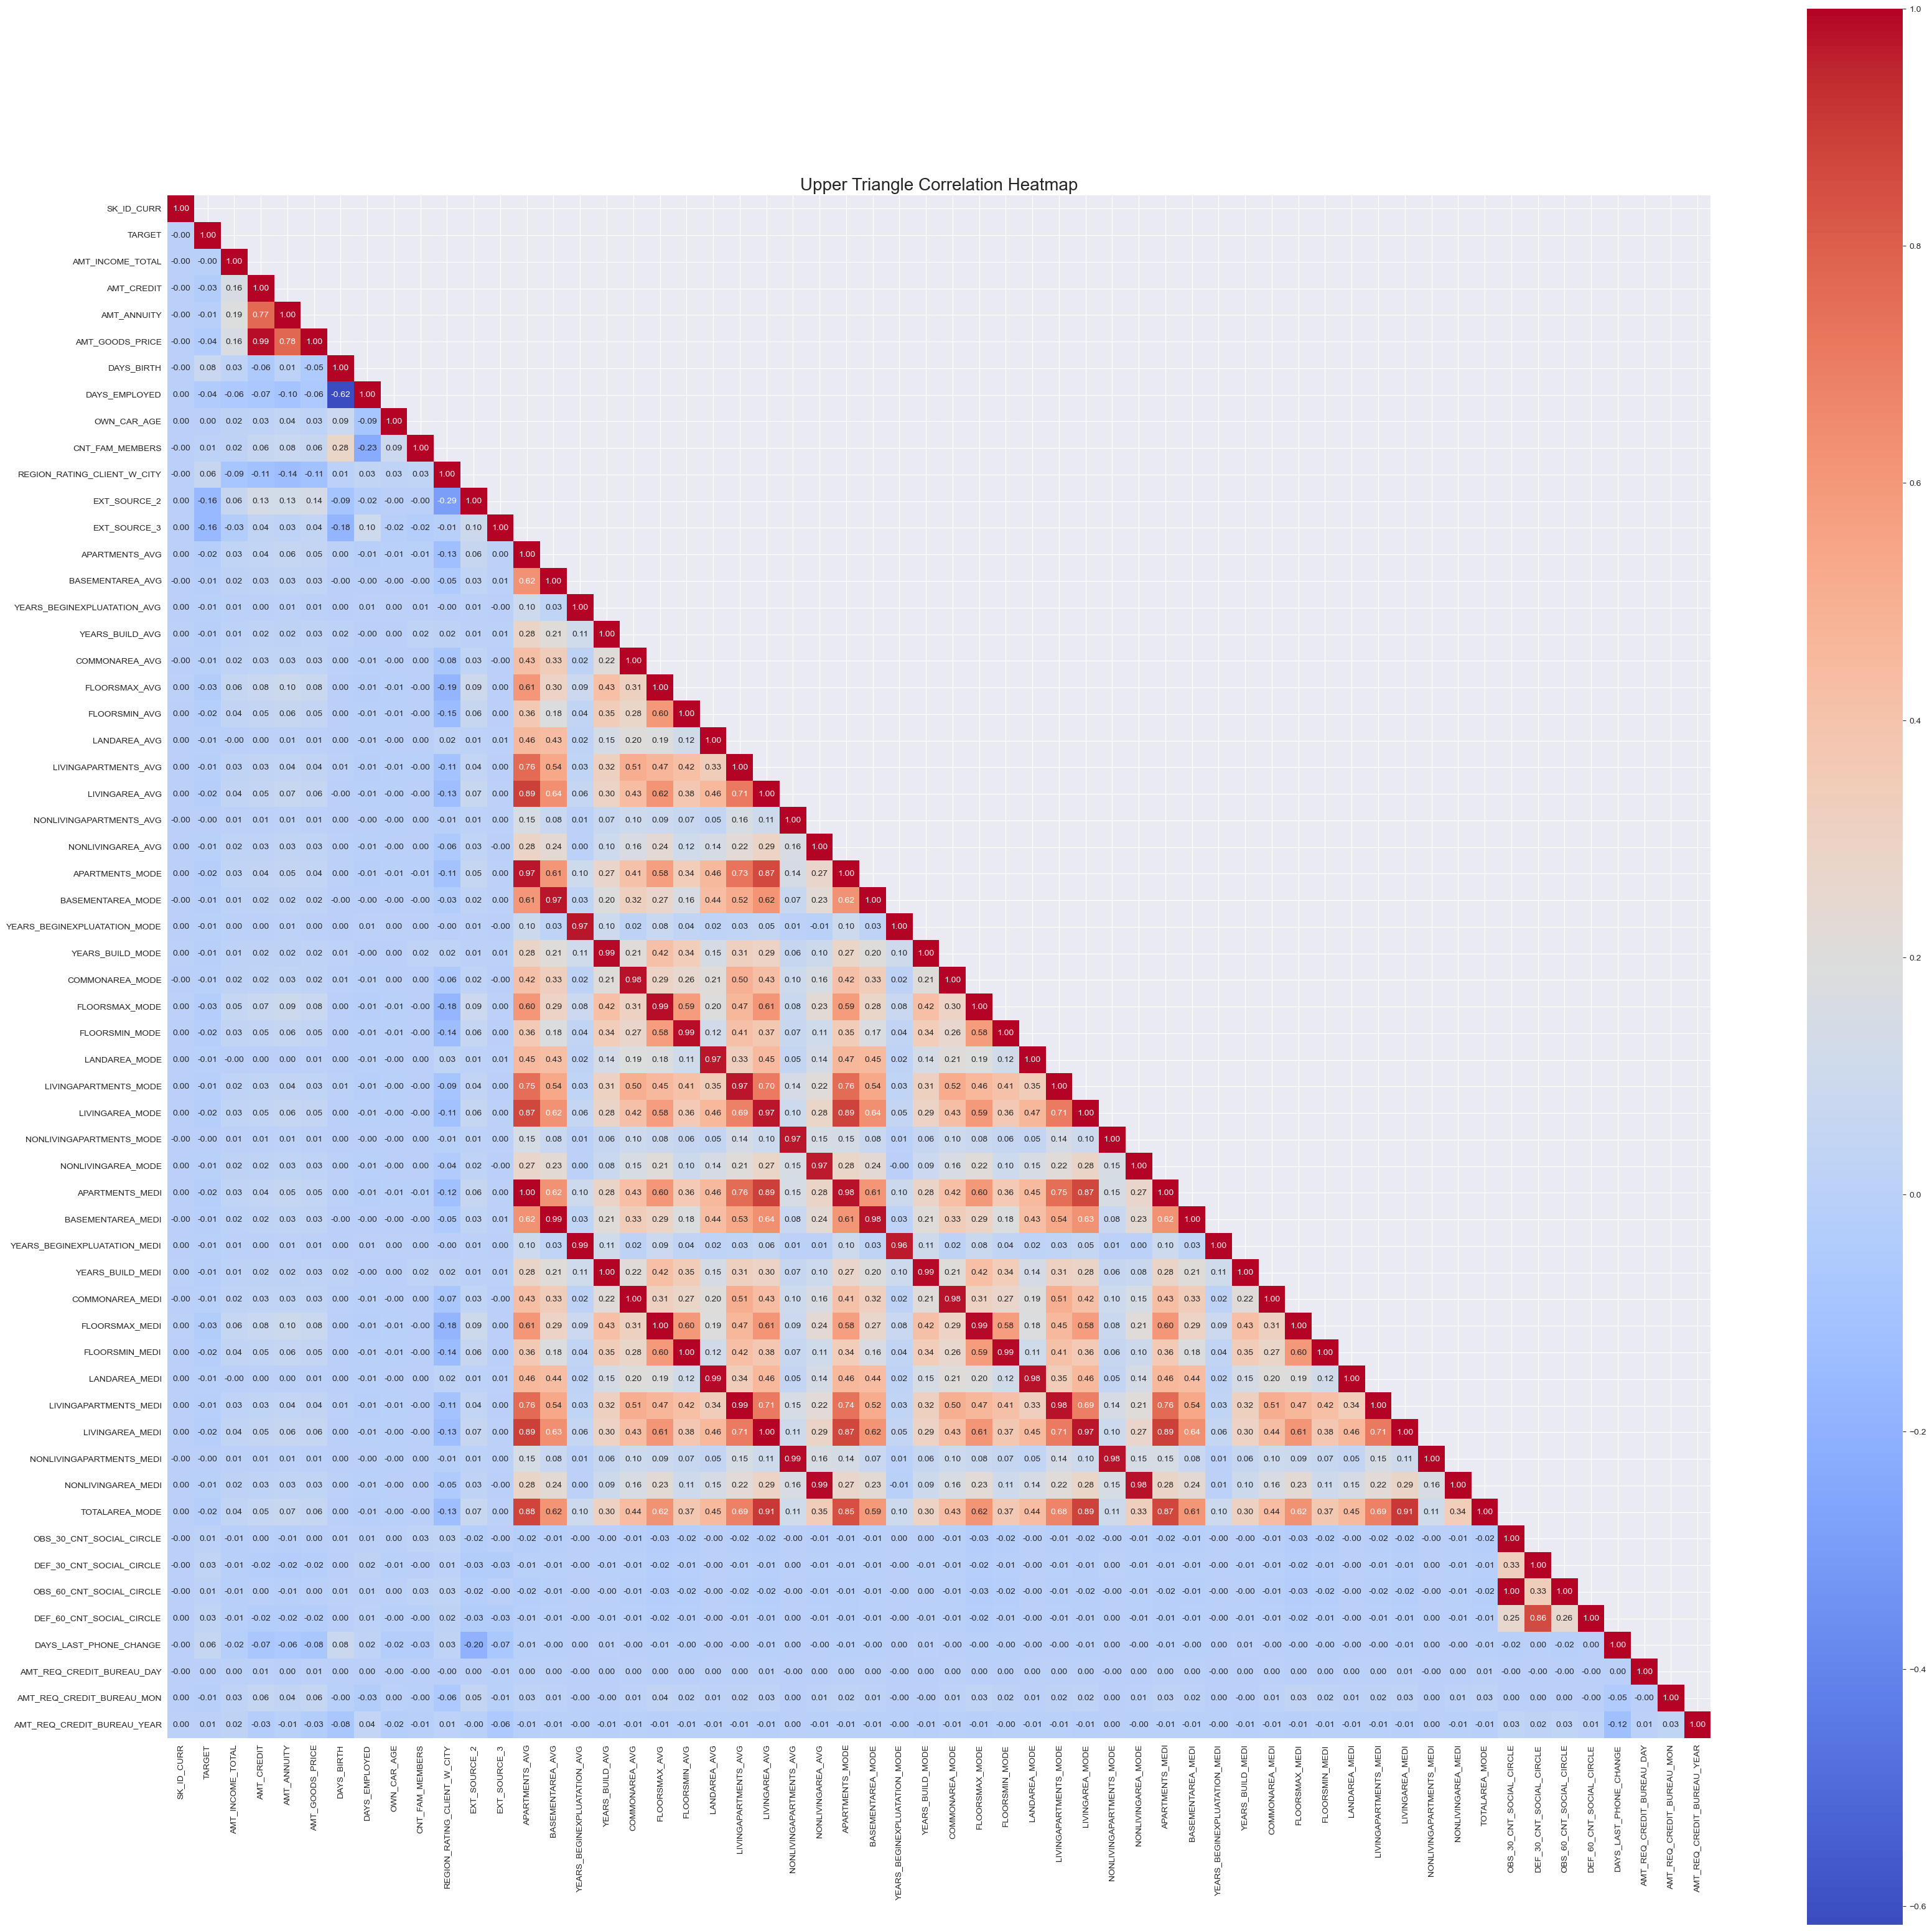

In [87]:
train_correlation_matrix = train_data.corr(numeric_only=True)
trainMask = numpy.array(train_correlation_matrix)
trainMask[numpy.tril_indices_from(trainMask)] = False
figure, axes = plt.subplots()
figure.set_size_inches(40, 40)
seaborn.heatmap(train_correlation_matrix,
                cmap="coolwarm",
                mask=trainMask,
                square=True,
                annot=True,
                fmt=".2f",
                cbar=True)
plt.title("Upper Triangle Correlation Heatmap", fontsize=20)
plt.show()

Let's remove all tightly correlated columns (We will remove modes, not means because these columns are normalized): APARTMENTS_MODE, BASEMENTAREA_MODE, YEARS_BEGINEXPLUATATION_MODE, YEARS_BUILD_MODE, COMMONAREA_MODE, FLOORSMAX_MODE, FLOORSMIN_MODE, LANDAREA_MODE, LIVINGAPARTMENTS_MODE, LIVINGAREA_MODE, NONLIVINGAPARTMENTS_MODE, NONLIVINGAREA_MODE, APARTMENTS_MEDI, BASEMENTAREA_MEDI, YEARS_BEGINEXPLUATATION_MEDI, YEARS_BUILD_MEDI, COMMONAREA_MEDI, FLOORSMAX_MEDI, FLOORSMIN_MEDI, LANDAREA_MEDI, LIVINGAPARTMENTS_MEDI, LIVINGAREA_MEDI, NONLIVINGAPARTMENTS_MEDI, NONLIVINGAREA_MEDI, TOTALAREA_MODE, LIVINGAPARTMENTS_AVG, LIVINGAREA_AVG, CES_30_CNT_SOCIAL_CIRCLE, DEF_30_CNT_SOCIAL_CIRCLE, AWT_GOODS_PRICE

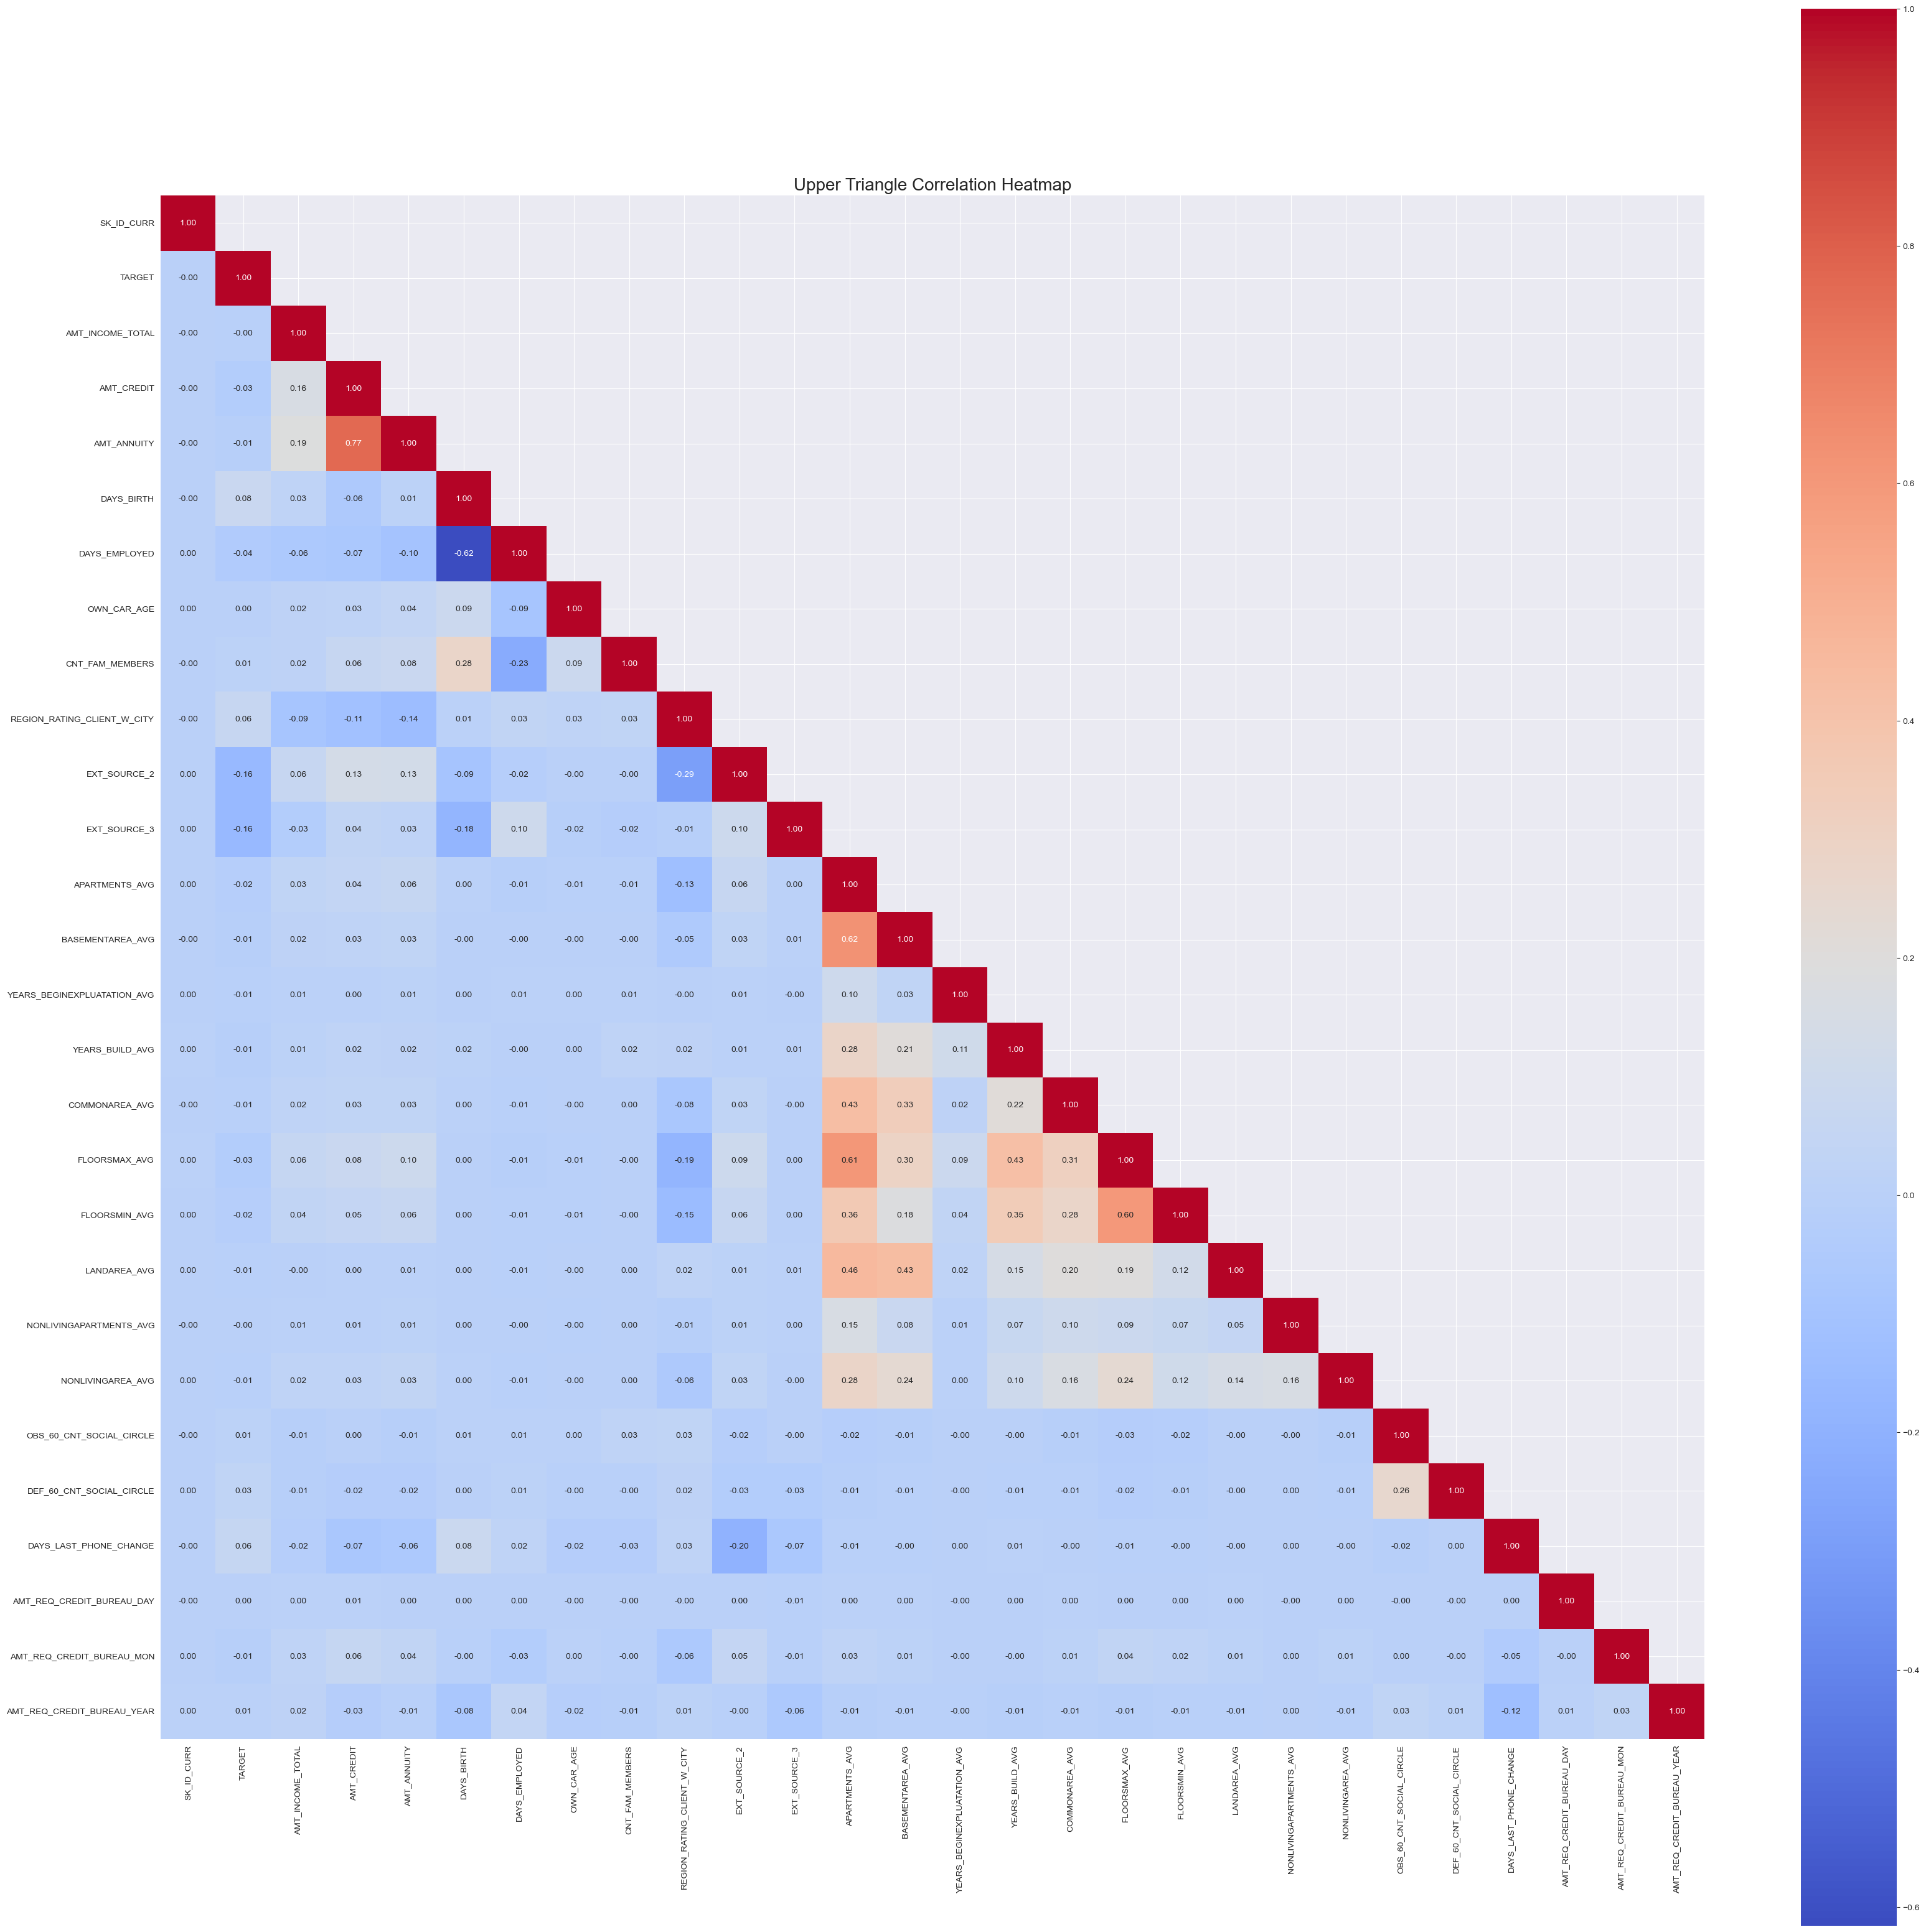

In [88]:
columns_to_remove = [
    'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE',
    'COMMONAREA_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE',
    'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI',
    'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI',
    'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI',
    'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'TOTALAREA_MODE', 'LIVINGAPARTMENTS_AVG',
    'LIVINGAREA_AVG', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'AMT_GOODS_PRICE'
]
train_data = train_data.drop(columns=columns_to_remove)
test_data = test_data.drop(columns=columns_to_remove)
train_correlation_matrix = train_data.corr(numeric_only=True)
trainMask = numpy.array(train_correlation_matrix)
trainMask[numpy.tril_indices_from(trainMask)] = False
figure, axes = plt.subplots()
figure.set_size_inches(40, 40)
seaborn.heatmap(train_correlation_matrix,
                cmap="coolwarm",
                mask=trainMask,
                square=True,
                annot=True,
                fmt=".2f",
                cbar=True)
plt.title("Upper Triangle Correlation Heatmap", fontsize=20)
plt.show()

Now looks much better, all the remaining columns have weak correlations between themselves. As the next step, creating histograms for numerical data:

array([[<Axes: title={'center': 'AMT_INCOME_TOTAL'}>,
        <Axes: title={'center': 'AMT_CREDIT'}>,
        <Axes: title={'center': 'AMT_ANNUITY'}>,
        <Axes: title={'center': 'DAYS_BIRTH'}>,
        <Axes: title={'center': 'DAYS_EMPLOYED'}>],
       [<Axes: title={'center': 'OWN_CAR_AGE'}>,
        <Axes: title={'center': 'CNT_FAM_MEMBERS'}>,
        <Axes: title={'center': 'REGION_RATING_CLIENT_W_CITY'}>,
        <Axes: title={'center': 'EXT_SOURCE_2'}>,
        <Axes: title={'center': 'EXT_SOURCE_3'}>],
       [<Axes: title={'center': 'APARTMENTS_AVG'}>,
        <Axes: title={'center': 'BASEMENTAREA_AVG'}>,
        <Axes: title={'center': 'YEARS_BEGINEXPLUATATION_AVG'}>,
        <Axes: title={'center': 'YEARS_BUILD_AVG'}>,
        <Axes: title={'center': 'COMMONAREA_AVG'}>],
       [<Axes: title={'center': 'FLOORSMAX_AVG'}>,
        <Axes: title={'center': 'FLOORSMIN_AVG'}>,
        <Axes: title={'center': 'LANDAREA_AVG'}>,
        <Axes: title={'center': 'NONLIVINGAPARTMENTS

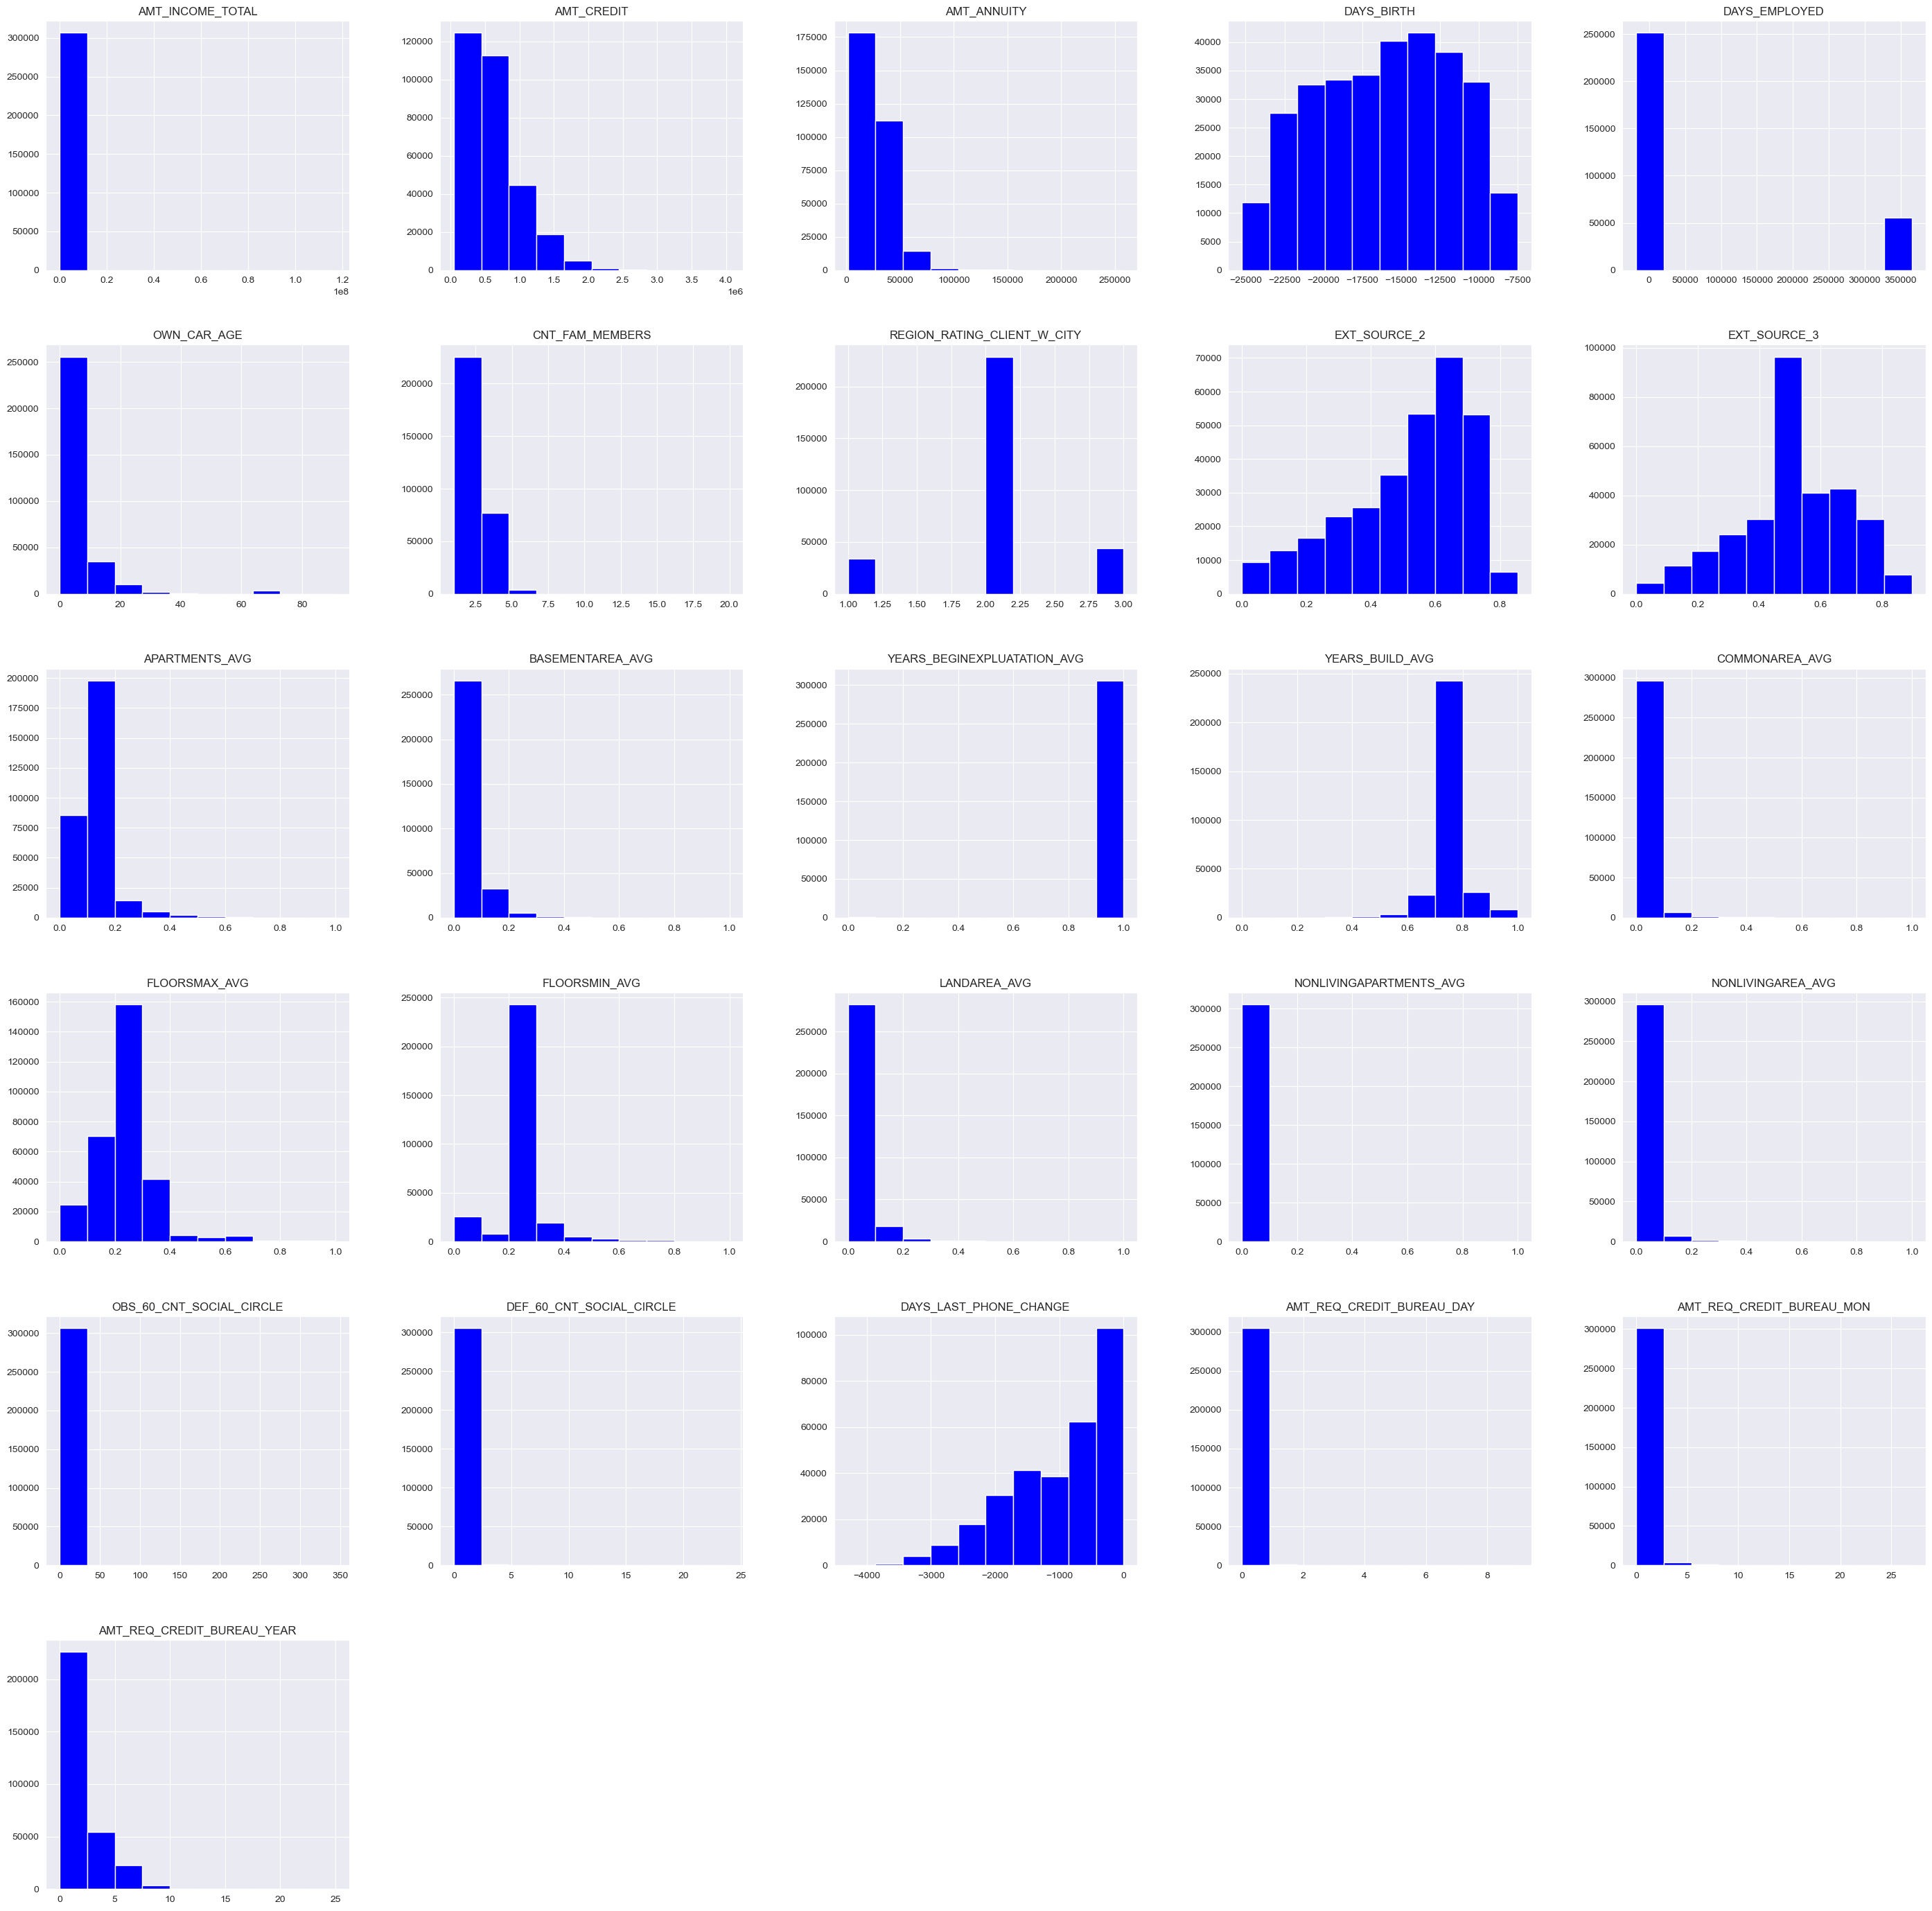

In [89]:
numerical_features = train_data.select_dtypes(include = ['int64', 'float64']).columns.delete(0).delete(0)
train_data[numerical_features].hist(figsize = (35, 35), color ='b')

Based on these histograms let's remove completely meaningless columns, where majority values are equal: NONLIVINGAPARTMENTS_AVG, YEARS_BEGINEXPLUATATION_AVG

In [90]:
columns_to_remove_value_not_different = [
    'NONLIVINGAPARTMENTS_AVG',
    'YEARS_BEGINEXPLUATATION_AVG'
]
train_data = train_data.drop(columns=columns_to_remove_value_not_different)
test_data = test_data.drop(columns=columns_to_remove_value_not_different)

As a final step with numerical columns, let's look at violin plot of each of them.

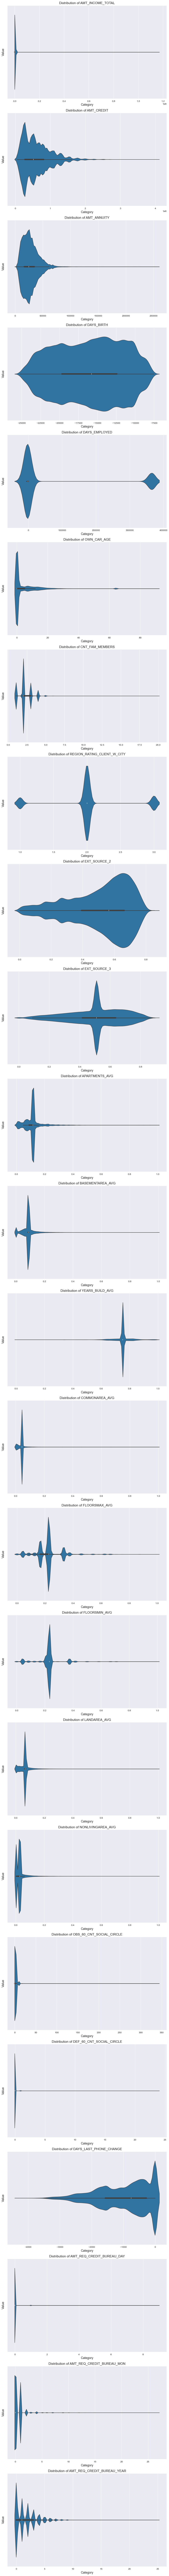

In [91]:
numerical_features = train_data.select_dtypes(include = ['int64', 'float64']).columns.delete(0).delete(0)
fig, axes = plt.subplots(nrows=len(numerical_features), ncols=1, figsize=(10, 150))
for idx, feature in enumerate(numerical_features):
    seaborn.violinplot(x=train_data[feature], ax=axes[idx])
    axes[idx].set_title(f'Distribution of {feature}', fontsize=14)
    axes[idx].set_xlabel('Category', fontsize=13)
    axes[idx].set_ylabel('Value', fontsize=13)
plt.tight_layout()
plt.show()

We're done with numerical columns, now let's take a look at columns which we'd earlier mark as categorical (both ordinal and nominal)

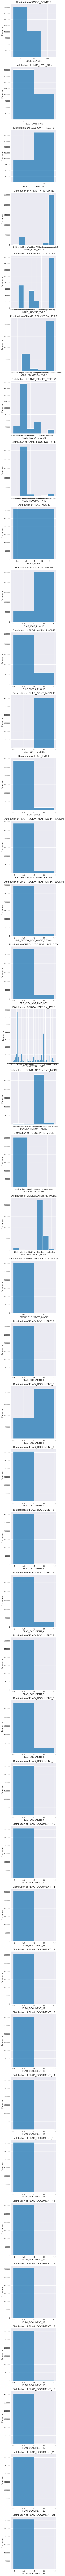

In [92]:
categorical_columns = train_data.select_dtypes(include=['category']).columns
fig, axes = plt.subplots(nrows=len(categorical_columns), ncols=1, figsize=(5, 200))
for idx, feature in enumerate(categorical_columns):
    seaborn.histplot(train_data[feature], kde=False, ax=axes[idx])
    axes[idx].set_title(f'Distribution of {feature}', fontsize=14)
    axes[idx].set_xlabel(feature, fontsize=12)
    axes[idx].set_ylabel('Frequency', fontsize=12)
plt.tight_layout()
plt.show()

Let's remove all the "category" columns where majority of values are identical, they dont provide any sense: FLAG_DOCUMENT_21, FLAG_DOCUMENT_20, FLAG_DOCUMENT_19, FLAG_DOCUMENT_17, FLAG_DOCUMENT_15, FLAG_DOCUMENT_14, FLAG_DOCUMENT_13, FLAG_DOCUMENT_12, FLAG_DOCUMENT_11, FLAG_DOCUMENT_10, FLAG_DOCUMENT_9, FLAG_DOCUMENT_7, FLAG_DOCUMENT_4, FLAG_DOCUMENT_2, FLAG_CONT_MOBILE, FLAG_MOBIL

In [93]:
cat_columns_to_remove = [
    'FLAG_DOCUMENT_21', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_17',
    'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_12',
    'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_7',
    'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_2', 'FLAG_CONT_MOBILE', 'FLAG_MOBIL'
]
train_data = train_data.drop(columns=cat_columns_to_remove)
test_data = test_data.drop(columns=cat_columns_to_remove)

And let's encode all the remaining cat columns for usage inside a model (for ordinals we will use label encoding, while for nominal - frequency encoding):

In [94]:
from sklearn.preprocessing import LabelEncoder

cat_columns = train_data.select_dtypes(include='category').columns.tolist()
encoder = LabelEncoder()
for col in cat_columns:
    if col in train_data.columns:
        if col in ordinal_columns:
            train_data[col] = encoder.fit_transform(train_data[col])
            test_data[col] = encoder.fit_transform(test_data[col])
        else:
            freq_encoding_train = train_data[col].value_counts(normalize=True)
            freq_encoding_test = test_data[col].value_counts(normalize=True)
            train_data[col] = train_data[col].map(freq_encoding_train)
            test_data[col] = test_data[col].map(freq_encoding_test)
train_data.isnull().sum()

SK_ID_CURR                     0
TARGET                         0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
NAME_TYPE_SUITE                0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
OWN_CAR_AGE                    0
FLAG_EMP_PHONE                 0
FLAG_WORK_PHONE                0
FLAG_EMAIL                     0
CNT_FAM_MEMBERS                0
REGION_RATING_CLIENT_W_CITY    0
REG_REGION_NOT_WORK_REGION     0
LIVE_REGION_NOT_WORK_REGION    0
REG_CITY_NOT_LIVE_CITY         0
ORGANIZATION_TYPE              0
EXT_SOURCE_2                   0
EXT_SOURCE_3                   0
APARTMENTS_AVG                 0
BASEMENTAREA_AVG               0
YEARS_BUILD_AVG                0
COMMONAREA

Let's standardize our columns:

In [95]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

full_data_without_target = train_data.drop(columns = ["TARGET"])
train_x, x_val, train_y, y_val = train_test_split(full_data_without_target, train_data["TARGET"], test_size = 0.2)
scaler = StandardScaler()
train_x_scaler = scaler.fit_transform(train_x)
x_val_scaler = scaler.transform(x_val)
test_data_scaler = scaler.transform(test_data)
log_reg_model = LogisticRegression(class_weight ="balanced", max_iter = 1500, tol = 0.001)
log_reg_model.fit(train_x_scaler, train_y)
predictedTrain = log_reg_model.predict(train_x_scaler)
print(roc_auc_score(train_y, predictedTrain))
predictedTest = log_reg_model.predict(x_val_scaler)
print(roc_auc_score(y_val, predictedTest))

0.6741018434239237
0.6769235488529373


Finally, let's check our result:

In [96]:
predicted_probability = log_reg_model.predict_proba(test_data_scaler)[:, 1]
testData = test_data.astype({"SK_ID_CURR": int})
result = pandas.DataFrame({"SK_ID_CURR": testData["SK_ID_CURR"], "TARGET": predicted_probability}).to_csv('submission.csv', index = False)

Result from kaggle:
Private score: 0.71701    Public score: 0.72
Screenshot is available under the link: https://imgur.com/a/gqClLzF